# [Problem 1] Obtaining a dataset

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("train.csv")

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# [Problem 2] Investigation of the dataset itself

This dataset, is a set of housing data that contains so many house characteristics that might be considered when purchasing or renting a house

**this contains some data fields like:**
- sale price
- sale conditions
- house style
- neighborhood

...

We may utilize this data set to visualize and comprehend some of the most significant factors influencing home sales.


# [Question 3] Confirmation of data

See what each feature looks like. (numeric data, character data, etc.)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Check which column is the target variable this time.
The target variable is: **sale price**

In [6]:
df["SalePrice"].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

Display the mean value, standard deviation, and quartile of the feature value at once.

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
df.loc[:, ["OverallQual"]].head()

,OverallQual
0,7
1,6
2,7
3,7
4,8


# [Question 4] Dealing with missing values

In [ ]:
import missingno as msno
%matplotlib inline

msno.matrix(df)

In [ ]:
msno.bar(df)

In [23]:
threshold  = 0
n_samples = len(df)
missing_rate = df.isnull().sum() / n_samples * 100
print("Features with missing rate higher than {}%.\n{}" .format(threshold, missing_rate[missing_rate > threshold]))

Features with missing rate higher than 0%.
LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [24]:
threshold  = 0

n_missing = df.isnull().sum()
print("Features with missing rate higher than {}%.\n{}" .format(threshold, n_missing[n_missing > threshold]))

Features with missing rate higher than 0%.
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [26]:
df_missing = pd.concat([n_missing, missing_rate], axis = 1)
df_missing = df_missing.rename(columns = {0: "total", 1: "missing_ratio"})
df_missing = df_missing.query("total > 0 and missing_ratio > 0")
display(df_missing)

,total,missing_ratio
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


In [28]:
threshold = 5
many_missing_features = df_missing.query("total >= {}" .format(threshold)).index
print("List of features with {} or mor missing features: \n{}" .format(threshold, many_missing_features))

List of features with 5 or mor missing features: 
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


Remove features (columns) with 5 or more missing values.

In [29]:
df_dropped_feat = df.drop(many_missing_features, axis = 1)
display(df_dropped_feat.head())

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Samples (rows) with missing values ​​are deleted from the data from which features with 5 or more missing values ​​have been deleted.

In [31]:
df_dropna = df_dropped_feat.dropna(axis = 0)
df_dropna = df_dropna.reset_index(drop = True)

print("Number of samples remaining: {}" .format(len(df_dropna)))
#msno.bar(df.dropna)

Number of samples remaining: 1459


# Question 5] Terminology research


**skewness** is a measurement of how much a distribution leans on the right(negative leaning curve) or the left(positive leaning curve)

**kurtosis** is a measurement of the thickness of the tails of a distribution

# [Question 6] Confirmation of distribution

skewness = 1.88  kurtois = 6.54


C:\Users\jansa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice'>

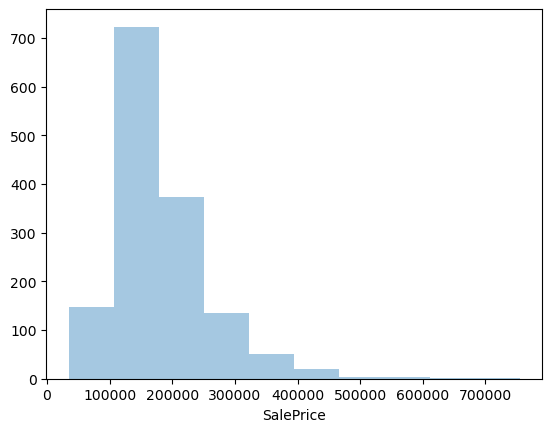

In [22]:
import seaborn as sns

target = df["SalePrice"]
print("skewness = {:.2f}  kurtois = {:.2f}". format(target.skew(), target.kurtosis()))
display(sns.distplot(target, kde = False, rug = False, bins = 10))

C:\Users\jansa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

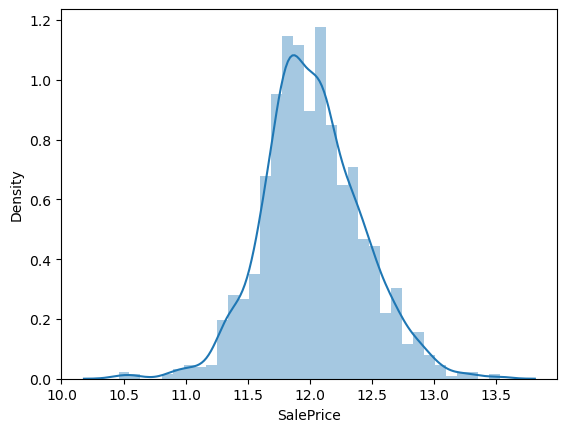

In [20]:
# Performs logarithmic transformation on the objective variable.
import numpy as np

logarithmically_transformed_houses = np.log(df['SalePrice'])

# The distribution is displayed for the logarithmically transformed one,
# and the "kurtosis" and "skewness" are also calculated.

sns.distplot(logarithmically_transformed_houses)

In [21]:
print("skewness: ", logarithmically_transformed_houses.skew())
print("kurtois: ", logarithmically_transformed_houses.kurt())

skewness:  0.12133506220520406
kurtois:  0.8095319958036296


# [Question 7] Check the correlation coefficient

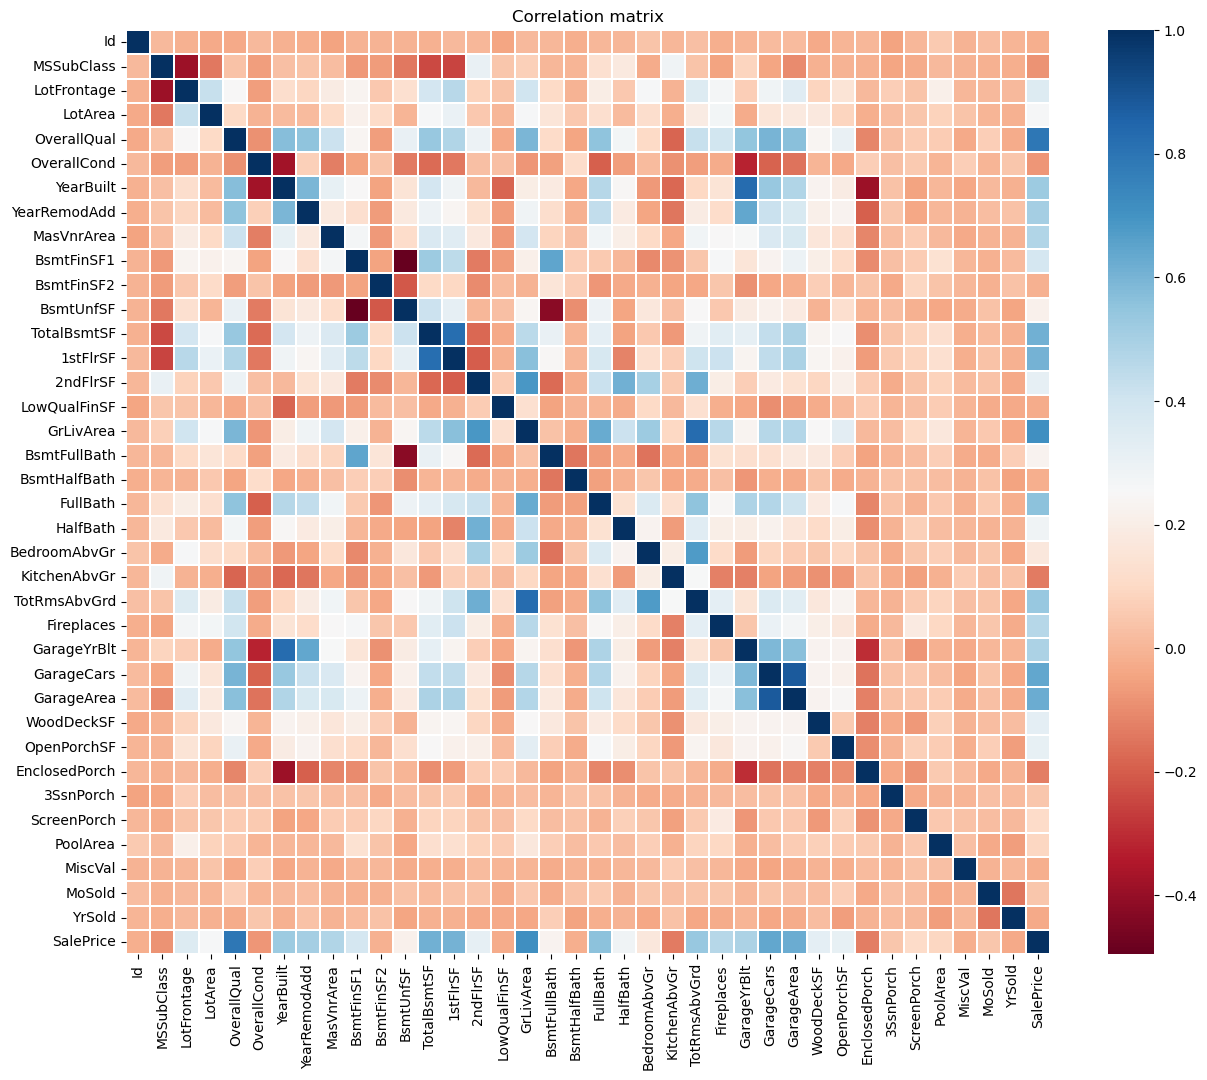

In [12]:
df_corr = df.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize = (15, 12))
plt.title("Correlation matrix")
sns.heatmap(df_corr, lw = 0.1, vmax = 1.0, square = True, cmap = colormap, 
            linecolor = "white", annot = False)

plt.show()

In [13]:
df_corr_saleprice = df_corr["SalePrice"].sort_values(ascending = False)
print(df_corr_saleprice[1:11])

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


<AxesSubplot:>

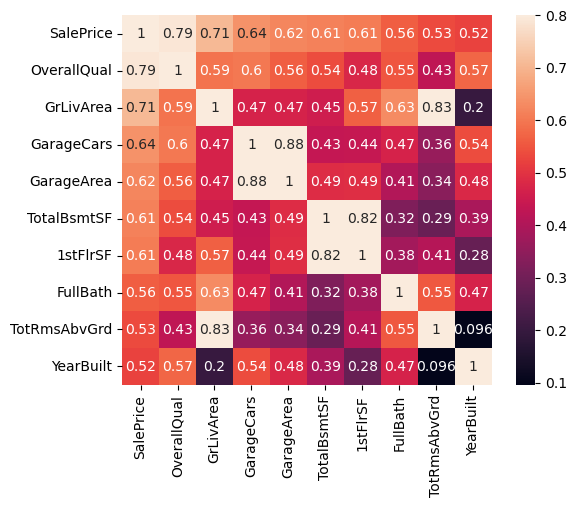

In [15]:
# Select 10 feature values that have a high correlation with the target variable, and create a correlation coefficient matrix heat map for only those 10 feature values.
number_of_variables = 10
selected_cols = df_corr.nlargest(number_of_variables,'SalePrice')['SalePrice'].index
correlation_coefficient = np.corrcoef(df[selected_cols].values.T)
sns.heatmap(correlation_coefficient, vmax=.8, square=True, yticklabels=selected_cols.values, xticklabels=selected_cols.values,annot=True)

##### Summarize whether the selected 10 feature quantities represent something in Japanese by referring to the description of Kaggle's DataDescription.

- saleprice: this is the price of the house
- OverallQual: this is the quality of the materials of the house
- GrLivArea: this is the area where the house is located in
- GarageCars: this indicated how many cars that can fit in the garage
- GarageArea: this describes the garage(size, location and other features the garage might have)
- TotalBmtSF: this indicates the size of the basement in squarefeet
- 1stFlrSF: this indicated the size of the first floor in squarefeet
- FullBath: this indicates the number of bathrooms
- TotRmsAbvGrd: this indicates the number of rooms
- YearBuilt: this indicates the year this house was built in

#### Among the 10 selected feature quantities, three combinations with high correlation coefficients are found.
- 'OverallQual' 
- 'GrLivArea'
- 'TotalBsmtSF'